# MNIST Occlusion Dataset

In this notebook, we will generate the new test dataset called **mnist_occ_black**, **mnist_occ_gauss**, and **mnist_occ_flower**. This dataset will generated from several type of noise:
1. Black noise
2. Random Gaussian noise
3. Flower pattern image

In [1]:
import os
import sys
sys.path.append(os.path.join(os.getcwd(), ".."))

import cv2
import numpy as np
from numpy.random import default_rng
import matplotlib.pyplot as plt
from PIL import Image

from Code.dataset_helpers import filelist_reader

In [2]:
# image path
root = '../dataset/MNIST_224X224_3'
gauss_noise = 'noise.jpg'
flower_pattern = 'flower_pattern.png'
test_data = 'test'
annot_file = 'pairs_test.txt'

## Helper Functions

Below are some helper functions that will be used to generate the occluded dataset. 

In [3]:
def load_occluders(root, img_path):
    img = Image.open(os.path.join(root, img_path))
    img = img.resize((224,224))
    occluder = np.asarray(img)
    return occluder


def black_noise(size = (224, 224)):
    return np.zeros((224,224,3), dtype = np.uint8)
    
    
def resize_image(img, scale_factor):
    new_size = (int(img.shape[0] * scale_factor), int(img.shape[1] * scale_factor))
    return cv2.resize(img, new_size, fx=scale_factor, fy=scale_factor, interpolation = cv2.INTER_AREA)
    
    
def occlude_with_noise(img, occluder, shift=30):
    result = img.copy()
    img_size = np.asarray([img.shape[1], img.shape[0]])
    scale_factor = min(img_size) / 224
    
    count = 1
    
    for _ in range(count):
        # resize the occluder
        random_scale_factor = np.random.uniform(0.4, 0.6)
        occ_scale_factor = scale_factor * random_scale_factor
        occluder = resize_image(occluder, occ_scale_factor)
        
        occ_center = np.random.uniform([shift,shift], img_size-shift)
        put_occlusion(occluder, result, occ_center)
        
        return result
        
        
def put_occlusion(img_src, img_dst, center):
    '''
    Put source image to destination image at specified center
    '''
    src_size = np.asarray([img_src.shape[1], img_src.shape[0]])
    dst_size = np.asarray([img_dst.shape[1], img_dst.shape[0]])
    
    # region of destination image that will be occluded
    center = center.astype(int)
    raw_start_dst = center - src_size // 2 # top left
    raw_end_dst = raw_start_dst + src_size # bottom right
    start_dst = np.clip(raw_start_dst, 0, dst_size)
    end_dst = np.clip(raw_end_dst, 0, dst_size)
    
    # region of source image to be extracted
    start_src = start_dst - raw_start_dst
    end_src = src_size +(end_dst - raw_end_dst)

    occ = img_src[start_src[1]:end_src[1], start_src[0]:end_src[0]]
    
    # occlusion
    img_dst[start_dst[1]:end_dst[1], start_dst[0]:end_dst[0]] = occ

## Visualization

In this section, we will visualize the occluders that we are going to use and try to put them into sample test dataset to see whether the occlusion is reasonable. As stated before, we will use three types of occlusion: **black noise**, **random gaussian noise**, and **flower pattern**

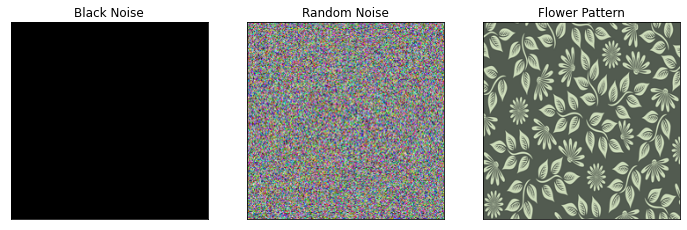

In [4]:
# show occluders
fig, ax = plt.subplots(1,3, figsize = (12,4))
ax = ax.flat

blk = black_noise()
ax[0].imshow(blk)
ax[0].set_title("Black Noise")

gauss = load_occluders(root, gauss_noise)
ax[1].imshow(gauss)
ax[1].set_title("Random Noise")

flower = load_occluders(root, flower_pattern)
ax[2].imshow(flower)
ax[2].set_title("Flower Pattern")

for axis in ax:
    axis.set_xticks([])
    axis.set_yticks([])

plt.show()

In [5]:
# load the annotation file
image_list = filelist_reader(os.path.join(root, annot_file))
print(f"Number of images in test set: {len(image_list)}")

Number of images in test set: 10000


First we will visualize some results from the occlusion with **black noise**. 
The left side of the figure shows the original images, while the right side shows the occluded images.
Run below cell multiple times to see more about this occlusion.

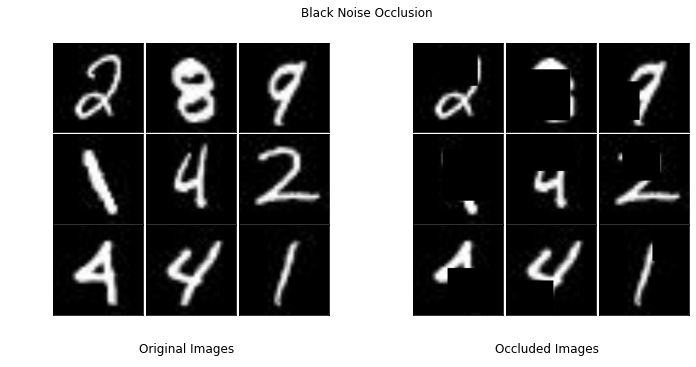

In [6]:
# run this cell multiple times
occluder = black_noise()
rng = default_rng()
index = rng.choice(len(image_list), size = 9, replace = False)

fig = plt.figure(figsize = (10, 5))
fig.suptitle("Black Noise Occlusion")
subfigs = fig.subfigures(1, 2, wspace = 0.01, hspace = 0.01)

ax0 = subfigs[0].subplots(3,3)
ax0 = ax0.flat
ax1 = subfigs[1].subplots(3,3)
ax1 = ax1.flat

for num, data_idx in enumerate(index):
    img_path, label = image_list[data_idx]
    sample_img = np.asarray(Image.open(os.path.join(root, test_data, img_path)))
    occluded_img = occlude_with_noise(sample_img, occluder)
    
    ax0[num].imshow(sample_img)
    ax1[num].imshow(occluded_img)
    
subfigs[0].supxlabel("Original Images")
subfigs[1].supxlabel("Occluded Images")

for axis in ax0:
    axis.set_xticks([])
    axis.set_yticks([])

for axis in ax1:
    axis.set_xticks([])
    axis.set_yticks([])
    
plt.subplots_adjust(wspace = 0.002, hspace = 0.02)
plt.show()

Next, we will see the occlusion using **random gaussian noise**.
The left side of the figure shows the original images, while the right side shows the occluded images.
Run below cell multiple times to see more about this occlusion.

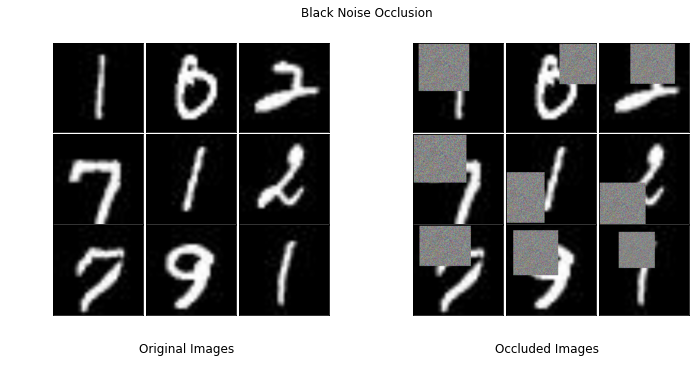

In [7]:
# run this cell multiple times
occluder = load_occluders(root, gauss_noise)
rng = default_rng()
index = rng.choice(len(image_list), size = 9, replace = False)

fig = plt.figure(figsize = (10, 5))
fig.suptitle("Black Noise Occlusion")
subfigs = fig.subfigures(1, 2, wspace = 0.01, hspace = 0.01)

ax0 = subfigs[0].subplots(3,3)
ax0 = ax0.flat
ax1 = subfigs[1].subplots(3,3)
ax1 = ax1.flat

for num, data_idx in enumerate(index):
    img_path, label = image_list[data_idx]
    sample_img = np.asarray(Image.open(os.path.join(root, test_data, img_path)))
    occluded_img = occlude_with_noise(sample_img, occluder)
    
    ax0[num].imshow(sample_img)
    ax1[num].imshow(occluded_img)
    
subfigs[0].supxlabel("Original Images")
subfigs[1].supxlabel("Occluded Images")

for axis in ax0:
    axis.set_xticks([])
    axis.set_yticks([])

for axis in ax1:
    axis.set_xticks([])
    axis.set_yticks([])
    
plt.subplots_adjust(wspace = 0.002, hspace = 0.02)
plt.show()

Now we will see the occlusion using **flower pattern**.
Same as before, the left side of the figure shows the original images, while the right side shows the occluded images.
Run below cell multiple times to see more about this occlusion.

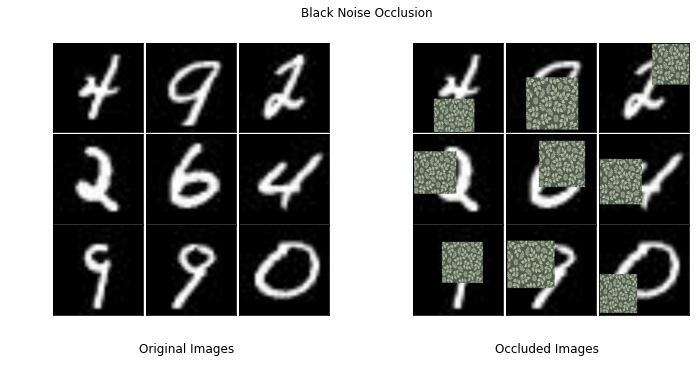

In [8]:
# run this cell multiple times
occluder = load_occluders(root, flower_pattern)
rng = default_rng()
index = rng.choice(len(image_list), size = 9, replace = False)

fig = plt.figure(figsize = (10, 5))
fig.suptitle("Black Noise Occlusion")
subfigs = fig.subfigures(1, 2, wspace = 0.01, hspace = 0.01)

ax0 = subfigs[0].subplots(3,3)
ax0 = ax0.flat
ax1 = subfigs[1].subplots(3,3)
ax1 = ax1.flat

for num, data_idx in enumerate(index):
    img_path, label = image_list[data_idx]
    sample_img = np.asarray(Image.open(os.path.join(root, test_data, img_path)))
    occluded_img = occlude_with_noise(sample_img, occluder)
    
    ax0[num].imshow(sample_img)
    ax1[num].imshow(occluded_img)
    
subfigs[0].supxlabel("Original Images")
subfigs[1].supxlabel("Occluded Images")

for axis in ax0:
    axis.set_xticks([])
    axis.set_yticks([])

for axis in ax1:
    axis.set_xticks([])
    axis.set_yticks([])
    
plt.subplots_adjust(wspace = 0.002, hspace = 0.02)
plt.show()

From the visualization figures above, we can see that the occlusion seems to be reasonable. So we are ready to generate the occluded test.

## Generate Occluded Test

Now we are ready to generate the occluded test dataset. We will save them into the same root folder of original MNIST dataset.

In [9]:
# image path
root = '../dataset/MNIST_224X224_3'
gauss_noise = 'noise.jpg'
flower_pattern = 'flower_pattern.png'
test_data = 'test'
annot_file = 'pairs_test.txt'

# save path
occ_black = 'test_occ_black_try'
occ_gauss = 'test_occ_gauss'
occ_flower = 'test_occ_flower'

In [10]:
# generate mnist_occ_black
occluder = black_noise()

for img_path, label in image_list:
    img_dir, img_file = img_path.split('/')
    
    img = np.asarray(Image.open(os.path.join(root, test_data, img_path)))
    occluded_img = occlude_with_noise(img, occluder)
    occluded_img = Image.fromarray(occluded_img)
    
    # save the image
    save_dir = os.path.join(root, occ_black, img_dir)
    
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
        
    occluded_img.save(os.path.join(save_dir, img_file))
print(f"mnist_occ_black is saved into: {os.path.join(root, occ_black)}")

mnist_occ_black is saved into: ../dataset/MNIST_224X224_3/test_occ_black_try


In [11]:
# generate mnist_occ_black
occluder = load_occluders(root, gauss_noise)

for img_path, label in image_list:
    img_dir, img_file = img_path.split('/')
    
    img = np.asarray(Image.open(os.path.join(root, test_data, img_path)))
    occluded_img = occlude_with_noise(img, occluder)
    occluded_img = Image.fromarray(occluded_img)
    
    # save the image
    save_dir = os.path.join(root, occ_gauss, img_dir)
    
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
        
    occluded_img.save(os.path.join(save_dir, img_file))
print(f"mnist_occ_gauss is saved into: {os.path.join(root, occ_gauss)}")

mnist_occ_gauss is saved into: ../dataset/MNIST_224X224_3/test_occ_gauss


In [12]:
# generate mnist_occ_black
occluder = load_occluders(root, flower_pattern)

for img_path, label in image_list:
    img_dir, img_file = img_path.split('/')
    
    img = np.asarray(Image.open(os.path.join(root, test_data, img_path)))
    occluded_img = occlude_with_noise(img, occluder)
    occluded_img = Image.fromarray(occluded_img)
    
    # save the image
    save_dir = os.path.join(root, occ_flower, img_dir)
    
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
        
    occluded_img.save(os.path.join(save_dir, img_file))
print(f"mnist_occ_flower is saved into: {os.path.join(root, occ_flower)}")

mnist_occ_flower is saved into: ../dataset/MNIST_224X224_3/test_occ_flower
